In [1]:
# standard imports
# Standard imports
import numpy as np
import pandas as pd

# my imports
import wrangle as w

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df, prep_df = w.get_zillow_data()

csv file found and loaded


In [27]:
df.head()

,bedrooms,bathrooms,area,property_value,yearbuilt,county
4,4.0,2.0,3633,296425.0,2005,LA
6,3.0,4.0,1620,847770.0,2011,LA
7,3.0,2.0,2077,646760.0,1926,LA
11,0.0,0.0,1200,5328.0,1972,LA
14,0.0,0.0,171,6920.0,1973,LA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035614 entries, 4 to 2152862
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bedrooms        float64
 1   bathrooms       float64
 2   area            int64  
 3   property_value  float64
 4   yearbuilt       int64  
 5   county          object 
dtypes: float64(3), int64(2), object(1)
memory usage: 108.7+ MB


In [5]:
df.shape

(2035614, 6)

In [6]:
# Bottom columns have nulls
df.isnull().sum()

bedrooms          0
bathrooms         0
area              0
property_value    0
yearbuilt         0
county            0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

bedrooms          0
bathrooms         0
area              0
property_value    0
yearbuilt         0
county            0
dtype: int64

In [9]:
df.shape

(2035614, 6)

In [10]:
2152863 - 2140235

12628

# 12,628 rows were dropped during the dropna.

In [11]:
df.head()

,bedrooms,bathrooms,area,property_value,yearbuilt,county
4,4.0,2.0,3633,296425.0,2005,LA
6,3.0,4.0,1620,847770.0,2011,LA
7,3.0,2.0,2077,646760.0,1926,LA
11,0.0,0.0,1200,5328.0,1972,LA
14,0.0,0.0,171,6920.0,1973,LA


In [12]:
# Change year build from a float to an int
# SAVE YOUR CHANGES TO THE DATAFRAME
df.yearbuilt = df.yearbuilt.astype(int)
df.yearbuilt

4          2005
6          2011
7          1926
11         1972
14         1973
           ... 
2152856    2015
2152858    2015
2152859    2014
2152861    2015
2152862    2014
Name: yearbuilt, Length: 2035614, dtype: int64

In [13]:
df.head()

,bedrooms,bathrooms,area,property_value,yearbuilt,county
4,4.0,2.0,3633,296425.0,2005,LA
6,3.0,4.0,1620,847770.0,2011,LA
7,3.0,2.0,2077,646760.0,1926,LA
11,0.0,0.0,1200,5328.0,1972,LA
14,0.0,0.0,171,6920.0,1973,LA


In [14]:
for i in df.columns:
    print (i)
    print(df[i].value_counts())
    print ('-----------------------')

bedrooms
3.0     939386
4.0     596258
2.0     329008
5.0     122737
1.0      22582
6.0      17647
0.0       4386
7.0       2848
8.0        538
9.0        136
10.0        55
11.0        16
13.0         5
15.0         4
12.0         4
14.0         2
16.0         2
Name: bedrooms, dtype: int64
-----------------------
bathrooms
2.00     932240
1.00     411507
3.00     400992
2.50     140080
4.00      63011
1.50      31019
3.50      22521
5.00      14244
4.50      10627
0.00       4248
6.00       2838
5.50       1231
7.00        621
6.50        150
8.00        134
7.50         66
9.00         30
10.00        16
0.50         13
11.00         5
16.00         4
1.75          3
20.00         3
9.50          3
18.00         2
14.00         2
12.00         1
8.50          1
13.00         1
15.00         1
Name: bathrooms, dtype: int64
-----------------------
area
1200     5175
1080     4374
1120     4351
1400     3813
1440     3668
         ... 
7741        1
13123       1
326         1
6876    

## Rename columns

In [15]:
df.columns

Index(['bedrooms', 'bathrooms', 'area', 'property_value', 'yearbuilt',
       'county'],
      dtype='object')

In [16]:
df = df.rename(columns={'bedroomcnt':'bedrooms', 'bathroomcnt':'bathrooms', 'calculatedfinishedsquarefeet':'area',
       'taxvaluedollarcnt':'taxvalue', 'fips':'county'})

In [17]:
df

,bedrooms,bathrooms,area,property_value,yearbuilt,county
4,4.0,2.0,3633,296425.0,2005,LA
6,3.0,4.0,1620,847770.0,2011,LA
7,3.0,2.0,2077,646760.0,1926,LA
11,0.0,0.0,1200,5328.0,1972,LA
14,0.0,0.0,171,6920.0,1973,LA
...,...,...,...,...,...,...
2152856,4.0,4.0,4375,422400.0,2015,LA
2152858,4.0,3.0,2262,960756.0,2015,Orange
2152859,4.0,4.5,3127,536061.0,2014,Orange
2152861,3.0,2.5,1974,424353.0,2015,Orange


## Handle nulls

In [18]:
#df = df.dropna()
#df.isnull().sum()

## Check 

In [19]:
#df.isnull().sum()

6037 - LA county
6059 - Orange county
6111 - Ventura county

In [20]:
df.head()

,bedrooms,bathrooms,area,property_value,yearbuilt,county
4,4.0,2.0,3633,296425.0,2005,LA
6,3.0,4.0,1620,847770.0,2011,LA
7,3.0,2.0,2077,646760.0,1926,LA
11,0.0,0.0,1200,5328.0,1972,LA
14,0.0,0.0,171,6920.0,1973,LA


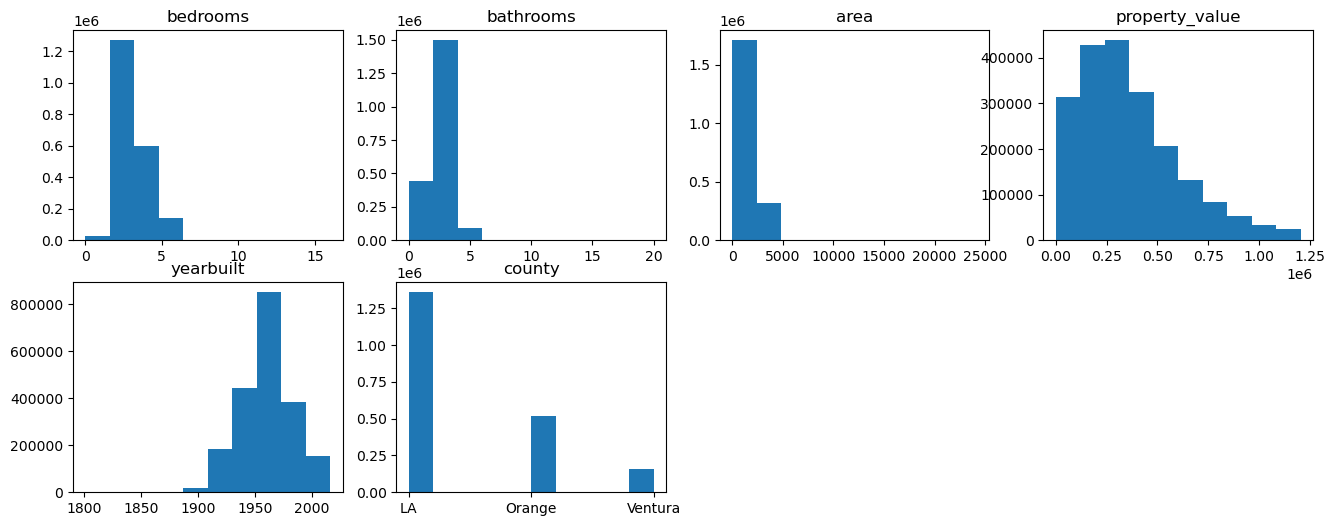

In [21]:
plt.figure(figsize=(16, 6))

for i, col in enumerate(df.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(2, 4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    plt.hist(df[col])

plt.show()

In [22]:
from sklearn.model_selection import train_test_split

bedrooms


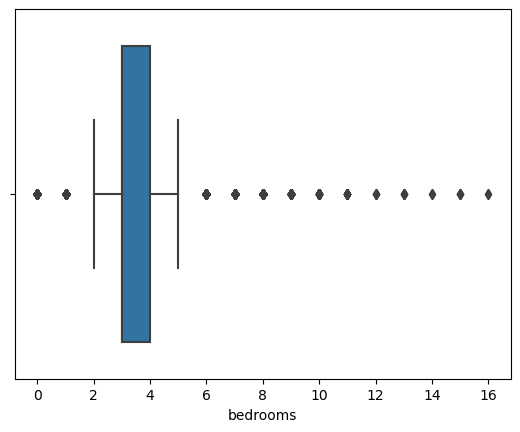

0.0       4386
1.0      22582
2.0     329008
3.0     939386
4.0     596258
5.0     122737
6.0      17647
7.0       2848
8.0        538
9.0        136
10.0        55
11.0        16
12.0         4
13.0         5
14.0         2
15.0         4
16.0         2
Name: bedrooms, dtype: int64

bathrooms


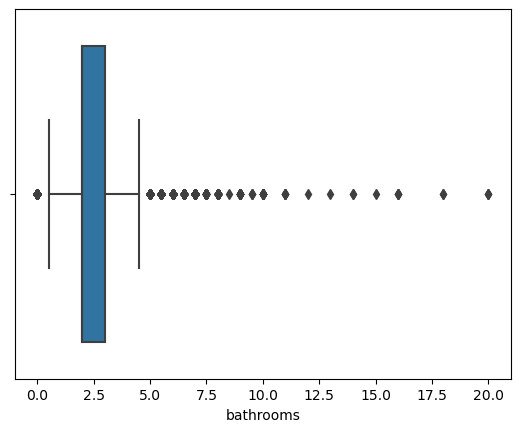

0.00       4248
0.50         13
1.00     411507
1.50      31019
1.75          3
2.00     932240
2.50     140080
3.00     400992
3.50      22521
4.00      63011
4.50      10627
5.00      14244
5.50       1231
6.00       2838
6.50        150
7.00        621
7.50         66
8.00        134
8.50          1
9.00         30
9.50          3
10.00        16
11.00         5
12.00         1
13.00         1
14.00         2
15.00         1
16.00         4
18.00         2
20.00         3
Name: bathrooms, dtype: int64

area


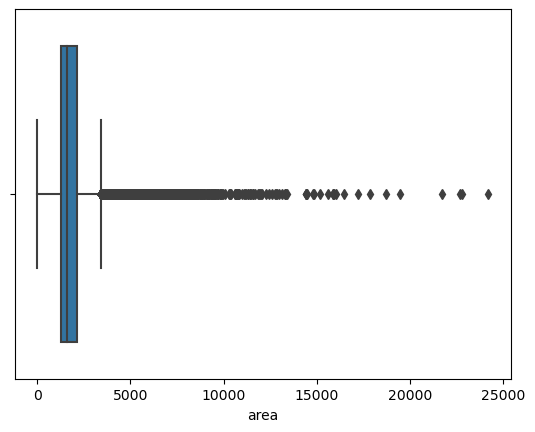

1        6
2        1
3        6
10       2
12       1
        ..
19460    1
21734    1
22702    1
22800    1
24220    1
Name: area, Length: 6652, dtype: int64

property_value


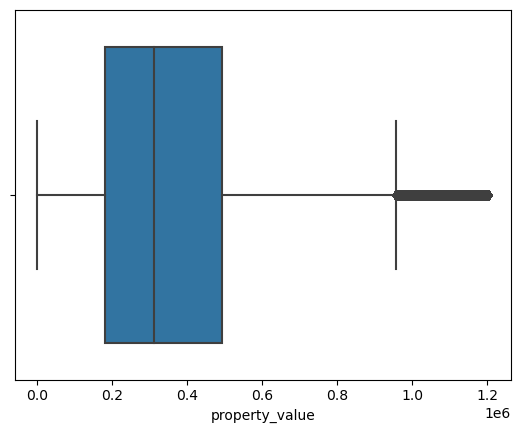

1.0           1
4.0           1
9.0          16
10.0         24
11.0          1
             ..
1203425.0     1
1203432.0     1
1203436.0     1
1203437.0     1
1203438.0     1
Name: property_value, Length: 523833, dtype: int64

yearbuilt


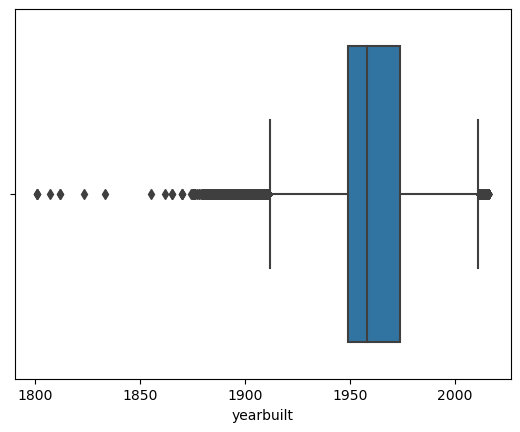

1801       3
1807       1
1812       2
1823       1
1833       1
        ... 
2012    2389
2013    3219
2014    3324
2015    2639
2016      74
Name: yearbuilt, Length: 152, dtype: int64



In [23]:
for col in df.columns[:-1]:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.show()
    
    print(df[col].value_counts().sort_index())
    print()

In [24]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.25, random_state=123)

In [25]:
train.head()

,bedrooms,bathrooms,area,property_value,yearbuilt,county
1284317,3.0,1.0,1020,69119.0,1944,LA
1082288,3.0,2.0,1522,430150.0,1951,LA
1842845,4.0,3.0,1878,392542.0,1956,LA
1531530,0.0,0.0,400,29701.0,1954,LA
457903,3.0,1.0,1419,421230.0,1952,LA


In [26]:
train.shape

(1221368, 6)